# **Property Median Value and Median Tax**

## Analysis of Property Housing Data for District 7

In this notebook, we will analyze property housing data to provide insights into two key issues for District 7:

1. **The median and mean property evaluations and their increase over the years.**
2. **The median and mean property taxes and their increase over the years.**

These metrics will be compared against the Boston citywide averages to understand how District 7 differs from the rest of the city.

### Tasks to Achieve These Insights:

- **Data Cleaning**: We will handle missing values, remove duplicates, and ensure consistency in data formats. This includes filtering the dataset to focus on properties that belong to District 7 (`is_d7`) or not.

- **Data Understanding**: We will review the metadata to interpret the meaning of each column. Key attributes of interest include:
  - **Total Property Price**
  - **Gross Tax**
  
  These attributes will help us contextualize property values and taxes.

- **Data Visualization**: We will create visualizations to compare trends over time. Specifically, we’ll analyze housing prices and property taxes in District 7 and compare these trends to Boston as a whole.

- **Analysis and Insights**: Finally, we will identify key patterns in the data. These insights will help inform policy or decision-making related to housing prices and property taxes, highlighting how District 7 might differ from the Boston average.

This outline provides a clear path for the analysis, emphasizing the comparison between District 7’s metrics and those of Boston as a whole.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)

In [3]:
boston_df = pd.read_csv("../data/d7-property-new.csv", low_memory=False)
boston_df.isna().sum().head(25) / len(boston_df)

PID              0.00
CM_ID            0.42
GIS_ID           0.00
ST_NUM           0.37
ST_NAME          0.00
ST_NAME_SUF      0.68
UNIT_NUM         0.57
ZIPCODE          0.34
PTYPE            0.67
LU               0.00
OWN_OCC          0.00
OWNER            0.00
MAIL_ADDRESSEE   0.69
MAIL_ADDRESS     0.34
MAIL CS          0.67
MAIL_ZIPCODE     0.34
AV_LAND          0.67
AV_BLDG          0.67
AV_TOTAL         0.67
GROSS_TAX        0.17
LAND_SF          0.16
YR_BUILT         0.11
YR_REMOD         0.79
GROSS_AREA       0.13
LIVING_AREA      0.13
dtype: float64

In [23]:
boston_df = pd.read_csv("../data/d7-property-new.csv", low_memory=False)
#boston_df["year"] = np.random.randint(2019, 2025, size=len(boston_df))
boston_df["GROSS_TAX"] = boston_df["GROSS_TAX"].replace({"\$": "", ",": ""}, regex=True).astype(float)
boston_df = boston_df[boston_df["AV_TOTAL"] != 0]
district7_df = boston_df[boston_df.is_d7 == 1]

In [63]:
district7_results = district7_df.groupby("year").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")
    ).reset_index()

boston_results = boston_df.groupby("year").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")).reset_index()

In [64]:
boston_results

,year,mean_housing_price,std_housing_price,median_housing_price,median_gross_tax,mean_gross_tax
0,2019,"2,020,183.31","24,998,561.33","518,400.00","7,008.67","279,350.34"
1,2020,"1,979,921.23","23,391,853.62","517,900.00","7,012.90","370,854.36"
2,2021,"1,954,208.41","24,496,593.55","516,200.00","6,992.58","294,905.91"
3,2022,"1,877,898.11","23,357,968.28","519,800.00","6,998.46","311,513.86"
4,2023,"2,032,048.71","27,176,823.55","516,600.00","7,033.63","330,469.45"
5,2024,"2,025,880.88","24,511,080.90","517,300.00","7,010.00","315,761.42"


In [67]:
def calculate_percentage_change(prices):
    return [0] + [
        ((prices.iloc[i] - prices.iloc[i - 1]) / prices.iloc[i - 1]) * 100
        for i in range(1, len(prices))
    ]

# Calculate percentage changes for district7
district7_median_percentage_change = calculate_percentage_change(district7_results["median_housing_price"])
district7_mean_percentage_change = calculate_percentage_change(district7_results["mean_housing_price"])
district7_median_tax_percentage_change = calculate_percentage_change(district7_results["median_gross_tax"])
district7_mean_tax_percentage_change = calculate_percentage_change(district7_results["mean_gross_tax"])

# Calculate percentage changes for boston
boston_median_percentage_change = calculate_percentage_change(boston_results["median_housing_price"])
boston_mean_percentage_change = calculate_percentage_change(boston_results["mean_housing_price"])
boston_median_tax_percentage_change = calculate_percentage_change(boston_results["median_gross_tax"])
boston_mean_tax_percentage_change = calculate_percentage_change(boston_results["mean_gross_tax"])

# Round the percentage change lists to 2 decimal places
district7_median_percentage_change = [round(value, 2) for value in district7_median_percentage_change]
district7_mean_percentage_change = [round(value, 2) for value in district7_mean_percentage_change]
district7_median_tax_percentage_change = [round(value, 2) for value in district7_median_tax_percentage_change]
district7_mean_tax_percentage_change = [round(value, 2) for value in district7_mean_tax_percentage_change]

boston_median_percentage_change = [round(value, 2) for value in boston_median_percentage_change]
boston_mean_percentage_change = [round(value, 2) for value in boston_mean_percentage_change]
boston_median_tax_percentage_change = [round(value, 2) for value in boston_median_tax_percentage_change]
boston_mean_tax_percentage_change = [round(value, 2) for value in boston_mean_tax_percentage_change]

# Print the final results
print("District 7 Median Percentage Change:", district7_median_percentage_change)
print("District 7 Mean Percentage Change:", district7_mean_percentage_change)
print("District 7 Median Tax Percentage Change:", district7_median_tax_percentage_change)
print("District 7 Mean Tax Percentage Change:", district7_mean_tax_percentage_change)
print("Boston Median Percentage Change:", boston_median_percentage_change)
print("Boston Mean Percentage Change:", boston_mean_percentage_change)
print("Boston Median Tax Percentage Change:", boston_median_tax_percentage_change)
print("Boston Mean Tax Percentage Change:", boston_mean_tax_percentage_change)

District 7 Median Percentage Change: [0, -1.62, -0.46, -1.4, 0.52, 1.78]
District 7 Mean Percentage Change: [0, -4.46, 18.91, 8.0, 11.74, -17.88]
District 7 Median Tax Percentage Change: [0, -1.12, -1.84, 0.2, 1.33, 0.83]
District 7 Mean Tax Percentage Change: [0, 39.32, -26.82, 19.4, 7.84, 4.28]
Boston Median Percentage Change: [0, -0.1, -0.33, 0.7, -0.62, 0.14]
Boston Mean Percentage Change: [0, -1.99, -1.3, -3.9, 8.21, -0.3]
Boston Median Tax Percentage Change: [0, 0.06, -0.29, 0.08, 0.5, -0.34]
Boston Mean Tax Percentage Change: [0, 32.76, -20.48, 5.63, 6.08, -4.45]


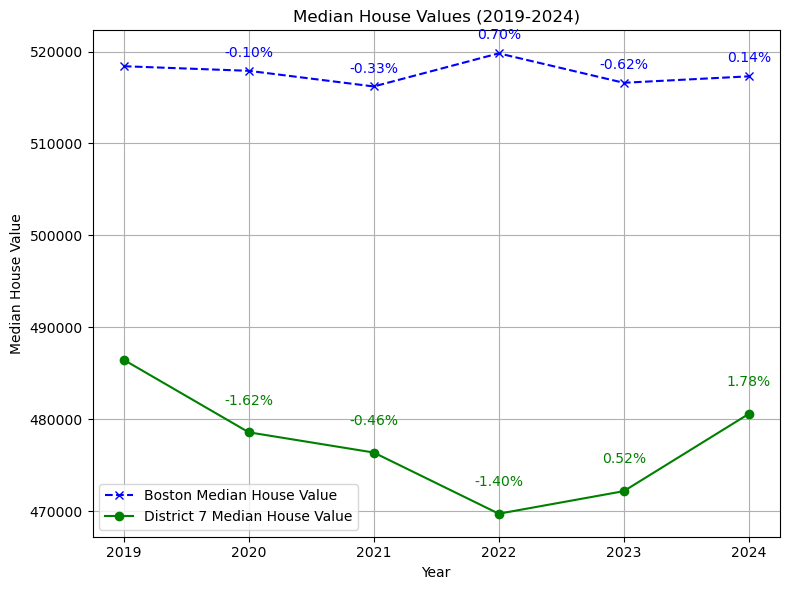

In [68]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["median_housing_price"], 
         linestyle="--", marker="x", label="Boston Median House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["median_housing_price"], 
         marker="o", label="District 7 Median House Value", color="green")

# Title and labels
plt.title("Median House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_median_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


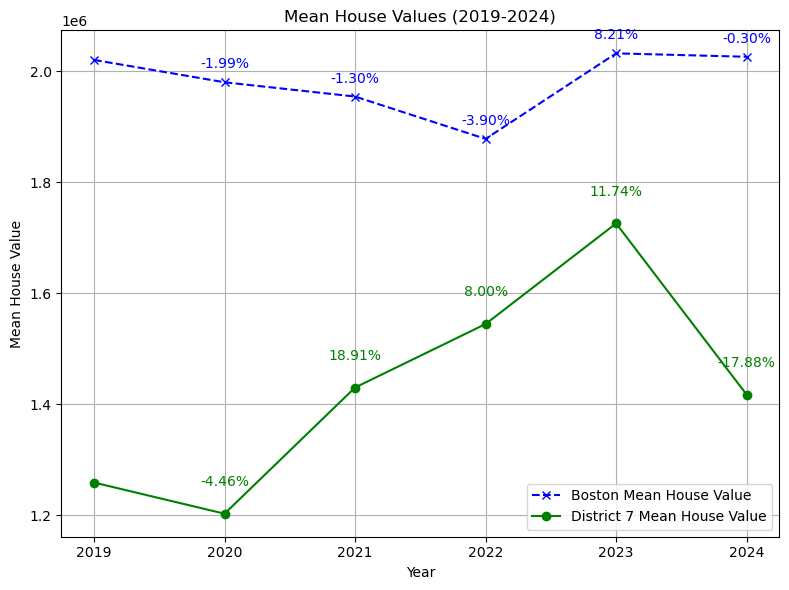

In [69]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["mean_housing_price"], 
         linestyle="--", marker="x", label="Boston Mean House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["mean_housing_price"], 
         marker="o", label="District 7 Mean House Value", color="green")

# Title and labels
plt.title("Mean House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_mean_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


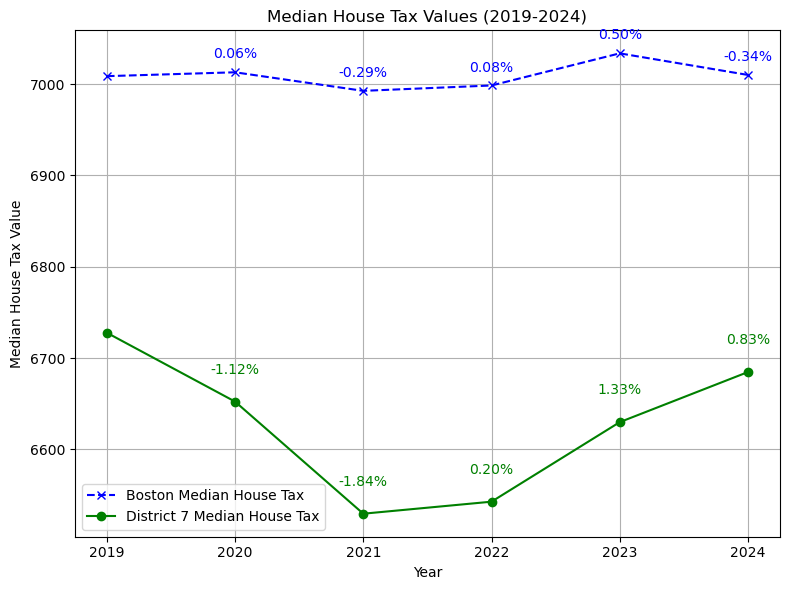

In [72]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["median_gross_tax"], 
         linestyle="--", marker="x", label="Boston Median House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["median_gross_tax"], 
         marker="o", label="District 7 Median House Tax", color="green")

# Title and labels
plt.title("Median House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Tax Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


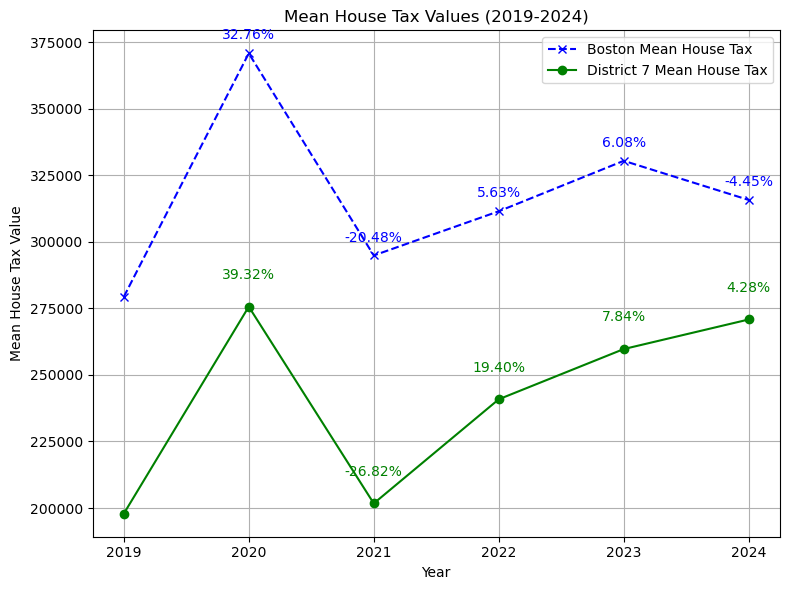

In [73]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["year"], boston_results["mean_gross_tax"], 
         linestyle="--", marker="x", label="Boston Mean House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["year"], district7_results["mean_gross_tax"], 
         marker="o", label="District 7 Mean House Tax", color="green")

# Title and labels
plt.title("Mean House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Tax Value")
plt.xticks(boston_results["year"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["year"])):
    plt.annotate(f"{boston_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], boston_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["year"][i], district7_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
